# Difusão Térmica Bidimensional (Aula 03/11)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Condições de Contorno

In [11]:
Lx = 50  # comprimento da placa em cm
Ly = 50  # largura da placa em cm
T = 400  # tempo total em segundos
alpha = 1.1532  # difusividade térmica do cobre em cm^2/s
dx = 5  # discretização em x em cm
dy = 5  # discretização em y em cm
dt = 4 # passo de tempo em segundos

# nx = 101
# ny = 101
nx = int(Lx / dx + 1) #+ 1
ny = int(Ly / dy + 1) #+ 1
c = alpha * dt / (dx ** 2)

x = np.linspace(0, np.pi, nx)
y = np.linspace(0, np.pi, ny)



if dt > dx ** 2 / (4 * c):
    print("O critério de estabilidade numérica não foi atendido.")
    exit()

u = np.zeros((nx, ny))

# # Condições iniciais e de contorno [minha lógica]
# u[0, :] = 60  # x = 0
# u[-1, :] = 20  # x = Lx
# u[:, 0] = 0  # y = 0
# u[:, -1] = 100  # y = Ly

# Condições iniciais e de contorno [professor]
u[:, 0 ] = 60  # x = 0
u[:,-1 ] = 20  # x = Lx
u[0,:] = 0  # y = 0
u[-1,:] = 100  # y = Ly

## Calor transiente 2D

In [12]:
for t in range(int( T / dt)):
    u_news = np.copy(u)
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
#             u_news[i, j] = u[i, j] + c * (u[i + 1, j] + u[i - 1, j] + u[i, j + 1] + u[i, j - 1] - 4 * u[i, j])

            u_news[i, j] = u[i, j] + c * (u[i + 1, j] - 2*u[i,j] + u[i, j + 1]) + c * (u[i, j + 1] - 2*u[i,j] + u[i, j -1])

    u = np.copy(u_news)

In [13]:
T_central = u[nx // 2, ny // 2]

print(f"A temperatura no ponto central da placa após {T} segundos é {T_central}°C.")

A temperatura no ponto central da placa após 400 segundos é 53.71265969483939°C.


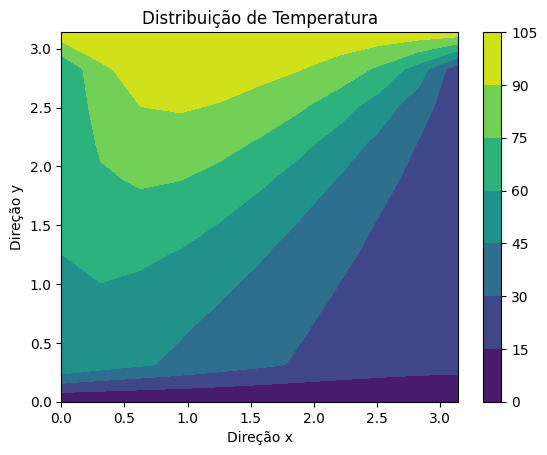

In [14]:
# x = np.linspace(0, Lx, nx)
# y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, u, cmap='viridis')
plt.colorbar()
plt.title('Distribuição de Temperatura')
plt.xlabel('Direção x')
plt.ylabel('Direção y')
plt.show()